# **K-Means Clustering Algorithm Task**
You have to apply k means clustering algorithm on the provided dataset. The output should have a cluster column at the last.                                                                                      


## **Part 1:**                                                             
You have to write algorithm of k-means clustering using only NumPy and pandas. You are not allowed to use any library for Part 1.

In [1]:
import numpy as np
import pandas as pd

In [6]:
# Load dataset
def load_dataset():
    df = pd.read_excel('salary_data.xlsx')
    print(f"Successfully loaded dataset with {df.shape[0]} rows and {df.shape[1]} columns")


    return df

# Preprocess dataset: handle categorical variables and normalization
def preprocess_data(df):
    # Convert categorical features to numeric using one-hot encoding
    # Apply scaling where needed
    # Drop irrelevant columns if needed

    processed_df = df.copy()

    # Convert categorical features to numeric using one-hot encoding
    categorical_cols = ['Education', 'WorkType', 'Gender']

    # Apply one-hot encoding
    processed_df = pd.get_dummies(processed_df, columns=categorical_cols, drop_first=True)

    # Extract features (excluding target if any)
    numeric_features = processed_df.select_dtypes(include=['float64', 'int64']).columns

    # Apply scaling/normalization (min-max scaling)
    for feature in numeric_features:
        min_val = processed_df[feature].min()
        max_val = processed_df[feature].max()
        processed_df[feature] = (processed_df[feature] - min_val) / (max_val - min_val)

    return processed_df

In [7]:
def kmeans_scratch(X, k, max_iters=100):
    # Convert input to numpy array if it's a pandas DataFrame
    if isinstance(X, pd.DataFrame):
        X = X.values

    # Ensure X contains only numeric values
    X = X.astype(np.float64)  # Convert to float64

    # Get dimensions
    n_samples, n_features = X.shape

    # Check for NaN or infinite values
    if np.isnan(X).any() or np.isinf(X).any():
        raise ValueError("Input data contains NaN or infinite values.")

    # Randomly initialize k centroids from the data points
    random_indices = np.random.choice(n_samples, k, replace=False)
    centroids = X[random_indices]

    # Initialize arrays
    labels = np.zeros(n_samples)
    distances = np.zeros((n_samples, k))

    # Main loop
    for iteration in range(max_iters):
        # Store old centroids for convergence check
        old_centroids = centroids.copy()

        # Calculate distance from each point to each centroid
        for i in range(k):
            # Euclidean distance calculation
            distances[:, i] = np.sqrt(np.sum((X - centroids[i])**2, axis=1))

        # Assign each point to the nearest centroid
        labels = np.argmin(distances, axis=1)

        # Update centroids based on the mean of assigned points
        for i in range(k):
            # Get all points assigned to this cluster
            cluster_points = X[labels == i]
            # If the cluster is not empty, update the centroid
            if len(cluster_points) > 0:
                centroids[i] = np.mean(cluster_points, axis=0)

        # Check for convergence (if centroids don't change)
        if np.all(old_centroids == centroids):
            break

    return labels, centroids



In [8]:
k = 4
max_iter = 200
df = load_dataset()
df_processed = preprocess_data(df)
labels, centroids = kmeans_scratch(df_processed, k)
df['Cluster'] = labels
print(df.head())

Successfully loaded dataset with 1000 rows and 8 columns
   Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21         44.89    182.80                    9   Masters  Private sector   
4   24        614.80    194.34                    0      GCSE  Private sector   

   Gender    Salary  Cluster  
0    Male  60173.49        3  
1  Female  42965.45        2  
2    Male  54924.41        0  
3  Female  26734.99        0  
4    Male  15325.23        2  


## **Part 2:**

Implement this task using the libraries. Explore Libraries of K-mean clustering algorithm.

In [9]:
from sklearn.cluster import KMeans

In [10]:
df = load_dataset()
df_processed = preprocess_data(df)


# Apply KMeans from sklearn using same k and maximum iterations
kmeans_sklearn = KMeans(n_clusters=k, max_iter=max_iter, random_state=42)
labels_sklearn = kmeans_sklearn.fit_predict(df_processed)
centroids_sklearn = kmeans_sklearn.cluster_centers_


Successfully loaded dataset with 1000 rows and 8 columns


In [11]:
df['Cluster'] = labels_sklearn
print("\nK-means from sklearn results:")
print(df.head())



K-means from sklearn results:
   Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21         44.89    182.80                    9   Masters  Private sector   
4   24        614.80    194.34                    0      GCSE  Private sector   

   Gender    Salary  Cluster  
0    Male  60173.49        3  
1  Female  42965.45        2  
2    Male  54924.41        3  
3  Female  26734.99        2  
4    Male  15325.23        0  


## **Part 3:** (Visualize for both part 1 and part 2)
Visualize the clusters using PCA (2D)

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [13]:
def visualize_clusters(X, labels, title):
    # Reduce dimensions to 2D using PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Create a scatter plot
    plt.figure(figsize=(10, 7))

    # Plot each cluster with a different color
    unique_labels = np.unique(labels)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

    for i, label in enumerate(unique_labels):
        plt.scatter(
            X_pca[labels == label, 0],
            X_pca[labels == label, 1],
            s=50,
            c=[colors[i]],
            label=f'Cluster {label}'
        )

    # Mark centroids if available in PCA space
    # Note: To show centroids properly, they would need to be transformed by the same PCA

    # Add labels and title
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

Successfully loaded dataset with 1000 rows and 8 columns


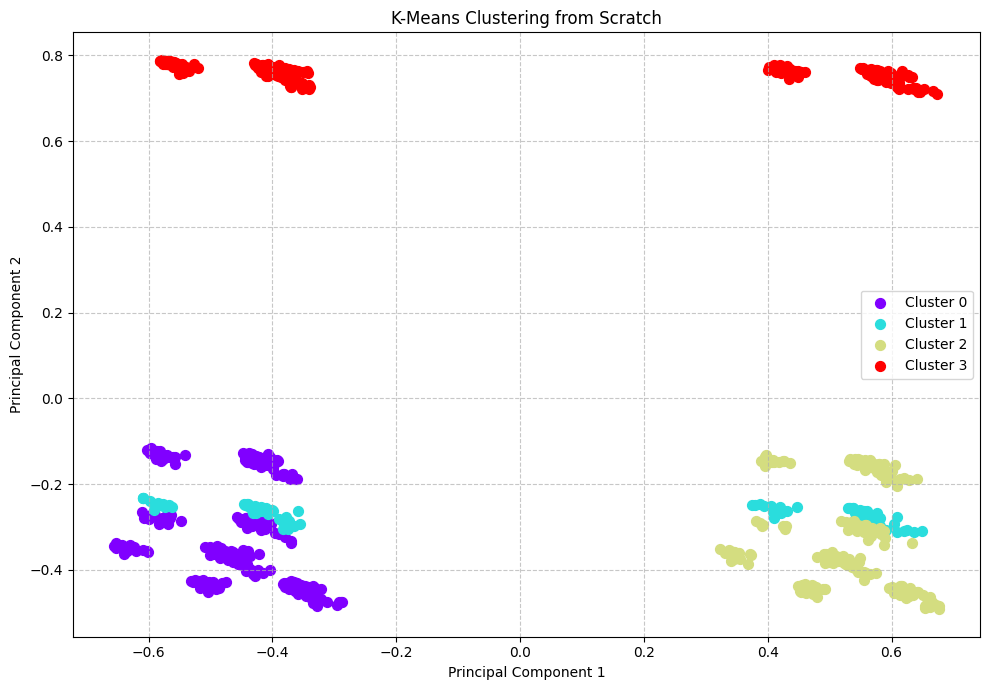

In [14]:
df = load_dataset()
df_processed = preprocess_data(df)
labels_scratch, centroids_scratch = kmeans_scratch(df_processed, k)
visualize_clusters(df_processed, labels_scratch, "K-Means Clustering from Scratch")

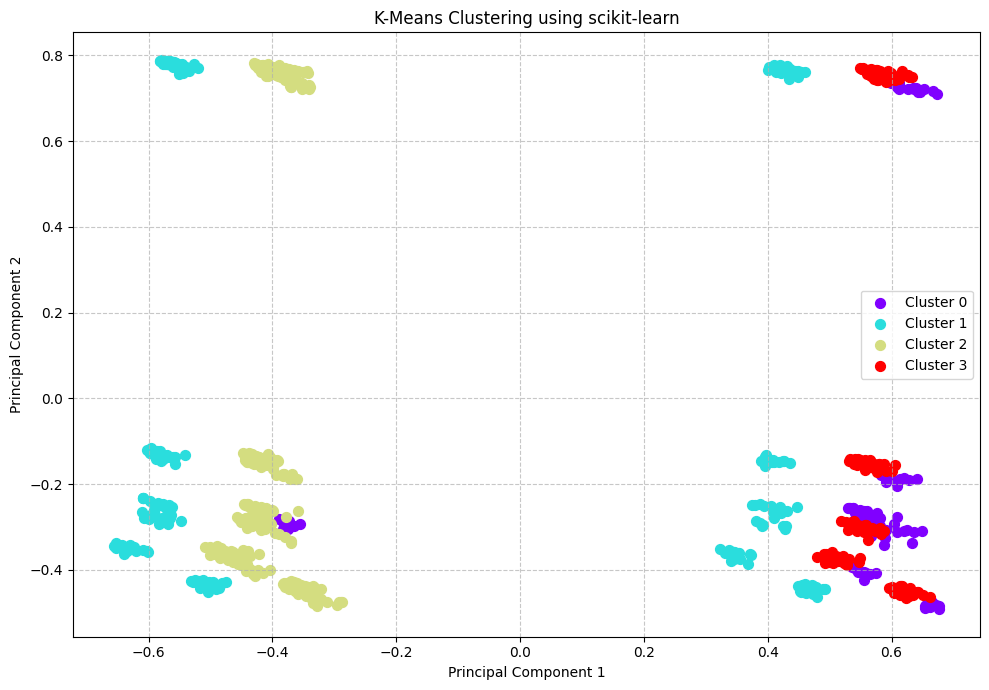

In [15]:


# Visualize results from Part 2 (sklearn)
labels_sklearn = kmeans_sklearn.fit_predict(df_processed)
visualize_clusters(df_processed, labels_sklearn, "K-Means Clustering using scikit-learn")